In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets
import numpy as np
from PIL import Image

import sys
sys.path.append('..')
from dataloader import get_train_loader

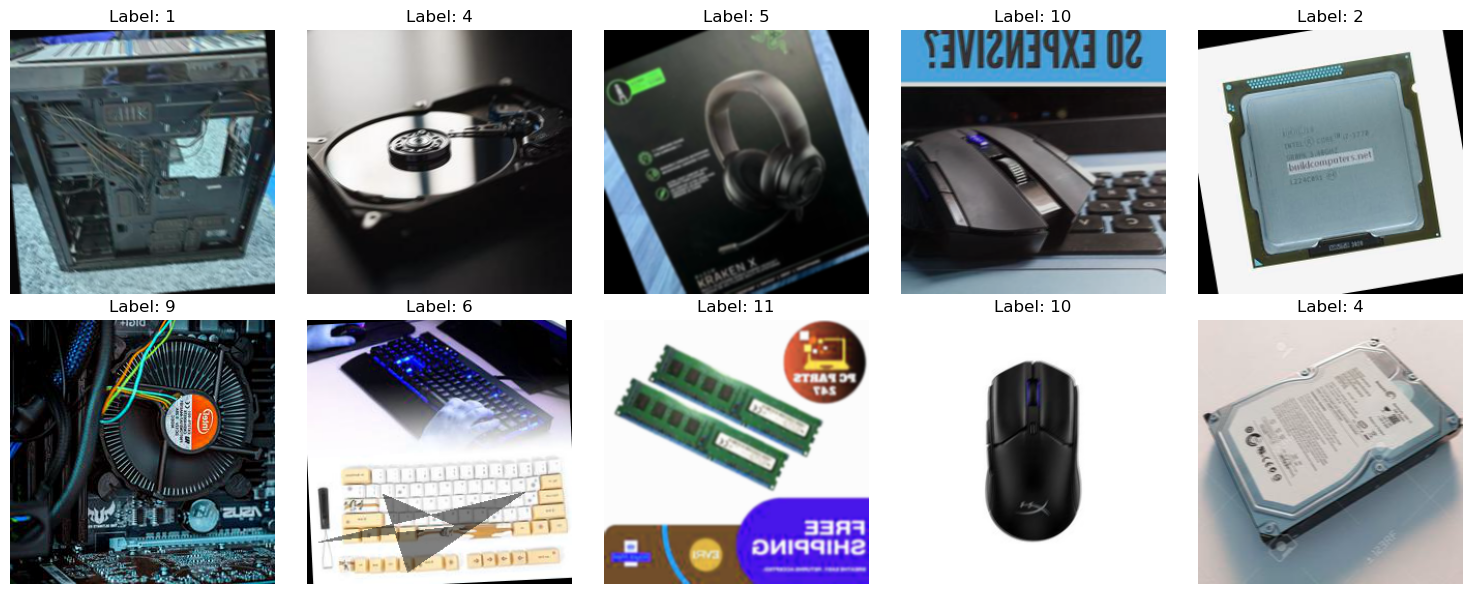

In [2]:
# Load the training data using the DataLoader
train_loader = get_train_loader(image_folder='../data/raw/pc_parts_train', batch_size=10)

# Get a batch of 10 images
images, labels = next(iter(train_loader))

# Visualize the images and their labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(10):
    # Convert from CxHxW to HxWxC
    image = images[i].numpy().transpose(1, 2, 0)
    
    # Scale from [0, 1] to [0, 255] if necessary
    if image.max() <= 1: image *= 255
    image = image.astype(np.uint8)
    
    # Convert grayscale to RGB if needed
    if image.shape[-1] == 1: image = np.repeat(image, 3, axis=-1)
    
    # Convert from BGR to RGB
    image = image[..., ::-1]
    
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {labels[i].item()}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()